<a href="https://colab.research.google.com/github/DamodaraBarbosa/linear_regression_studies/blob/main/Brazil_Cars_Prices_2022_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sns.set()

# Carregando a base de dados em um dataframe

In [3]:
cars = pd.read_csv('/content/drive/MyDrive/PracticingDataLinearRegression/fipe_2022.csv')
cars.head()

year_of_reference month_of_reference fipe_code authentication  brand  \
0               2022            January  038001-6     vwmrywl5qs  Acura   
1               2022            January  038001-6     t9mt723qhz  Acura   
2               2022            January  038001-6     tr5wv4z21g  Acura   
3               2022            January  038001-6     s2xxsjz3mt  Acura   
4               2022            January  038001-6     rtm9gj7zk8  Acura   

     model      fuel    gear  engine_size  year_model  avg_price_brl  \
0  NSX 3.0  Gasoline  manual          3.0        1995        43779.0   
1  NSX 3.0  Gasoline  manual          3.0        1994        42244.0   
2  NSX 3.0  Gasoline  manual          3.0        1993        40841.0   
3  NSX 3.0  Gasoline  manual          3.0        1992        39028.0   
4  NSX 3.0  Gasoline  manual          3.0        1991        35678.0   

   age_years  
0         28  
1         29  
2         30  
3         31  
4         32

As dimensões do *dataframe*: 

In [4]:
cars.shape

(290275, 12)

Algumas informações sobre o *dataframe*:

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   290275 non-null  int64  
 1   month_of_reference  290275 non-null  object 
 2   fipe_code           290275 non-null  object 
 3   authentication      290275 non-null  object 
 4   brand               290275 non-null  object 
 5   model               290275 non-null  object 
 6   fuel                290275 non-null  object 
 7   gear                290275 non-null  object 
 8   engine_size         290275 non-null  float64
 9   year_model          290275 non-null  int64  
 10  avg_price_brl       290275 non-null  float64
 11  age_years           290275 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 26.6+ MB


# Análise das variáveis

Por se tratar de uma base de dados que contém carros, há informações sobre modelos, marcas, tipo de motor, combustíveis entre outros dados que precisam ser conhecidos.

In [6]:
cars.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl', 'age_years'],
      dtype='object')

## Coluna `year_of_reference`

In [7]:
cars['year_of_reference'].unique()

array([2022])

Por se tratar de vendas referentes ao ano de 2022, nesta coluna há apenas 2022. Certamente é uma coluna que será eliminada do *dataframe* posteriormente.

## Coluna `month_of_reference`

In [8]:
cars['month_of_reference'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

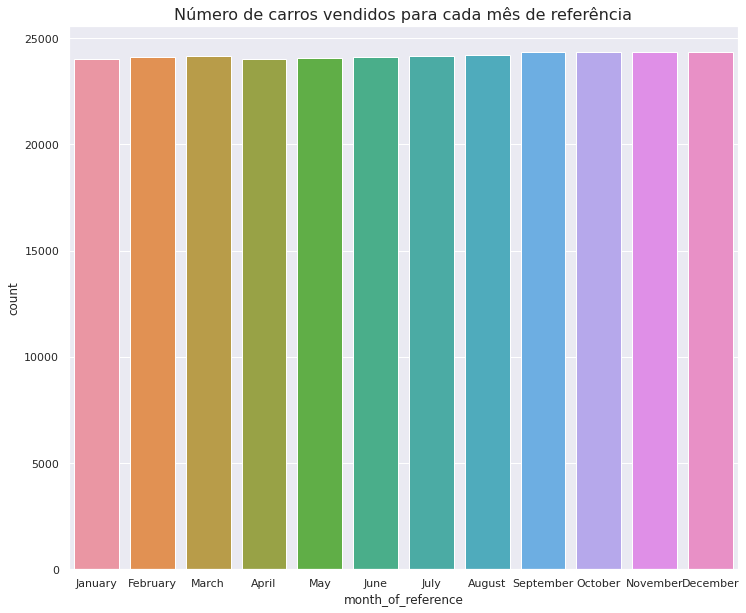

In [9]:
plt.figure(figsize= (12, 10))
ax = sns.countplot(data= cars, x= 'month_of_reference')
ax.set_title('Número de carros vendidos para cada mês de referência', fontsize= 16)
plt.show()

## Coluna `fipe_code`

In [10]:
cars['fipe_code'].unique()

array(['038001-6', '038002-4', '038003-2', ..., '005534-4', '005535-2',
       '005536-0'], dtype=object)

In [11]:
f'São ao todo {len(cars["fipe_code"].unique())} códigos FIPE diferentes.'

'São ao todo 5903 códigos FIPE diferentes.'

* O que é o código FIPE?

"O código FIPE é um número atrelado a cada versão específica de um modelo dentro da tabela FIPE."

Fonte: https://www.karvi.com.br/blog/tabela-fipe-como-consultar/#:~:text=O%20c%C3%B3digo%20FIPE%20%C3%A9%20um,%C3%A9%20formado%20por%20sete%20n%C3%BAmeros.

## Coluna `authentication`

In [12]:
cars['authentication'].unique()

array(['vwmrywl5qs', 't9mt723qhz', 'tr5wv4z21g', ..., 'lh98rfxnhy18',
       'k9dtwsps5sy1', 'j7gt9020nqvt'], dtype=object)

In [13]:
f'São ao todo {len(cars["authentication"].unique())} códigos de autenticação diferentes.'

'São ao todo 290273 códigos de autenticação diferentes.'

Ou seja, para cada transação há um código específico de autenticação.

## Coluna `brand`

In [14]:
cars['brand'].unique()

array(['Acura', 'Agrale', 'Alfa Romeo', 'AM Gen', 'Asia Motors',
       'ASTON MARTIN', 'Audi', 'Baby', 'BMW', 'BRM', 'CAB Motors',
       'Cadillac', 'CBT Jipe', 'CHANA', 'CHANGAN', 'Caoa Chery',
       'GM - Chevrolet', 'Chrysler', 'Citroën', 'Cross Lander', 'Daewoo',
       'Daihatsu', 'Dodge', 'EFFA', 'Engesa', 'Envemo', 'Ferrari', 'Fiat',
       'Fibravan', 'Ford', 'FOTON', 'Fyber', 'GEELY', 'GREAT WALL',
       'HAFEI', 'Honda', 'Hyundai', 'Isuzu', 'IVECO', 'JAC', 'Jaguar',
       'Jeep', 'JINBEI', 'JPX', 'Kia Motors', 'Lada', 'Land Rover',
       'Lexus', 'LIFAN', 'LOBINI', 'Lotus', 'Mahindra', 'Maserati',
       'Matra', 'Mazda', 'Mclaren', 'Mercedes-Benz', 'Mercury', 'MG',
       'MINI', 'Mitsubishi', 'Nissan', 'Peugeot', 'Plymouth', 'Pontiac',
       'Porsche', 'RAM', 'RELY', 'Renault', 'Rolls-Royce', 'Rover',
       'Saab', 'Saturn', 'Seat', 'SHINERAY', 'smart', 'SSANGYONG',
       'Subaru', 'Suzuki', 'TAC', 'Toyota', 'Troller', 'VW - VolksWagen',
       'Volvo', 'Wake', 'Wa

In [15]:
f'São ao todo {len(cars["brand"].unique())} marcas diferentes presentes na tabela.'

'São ao todo 86 marcas diferentes presentes na tabela.'

É possível plotar um gráfico mostrando quais as marcas de carro que mais venderam durante o ano de 2022.

In [16]:
brand_sales = cars.value_counts('brand')
brand_sales

brand
GM - Chevrolet     28179
VW - VolksWagen    28142
Fiat               26563
Ford               24150
Mercedes-Benz      17470
                   ...  
Saturn                24
Saab                  24
GEELY                 24
SHINERAY              24
Lotus                 24
Length: 86, dtype: int64

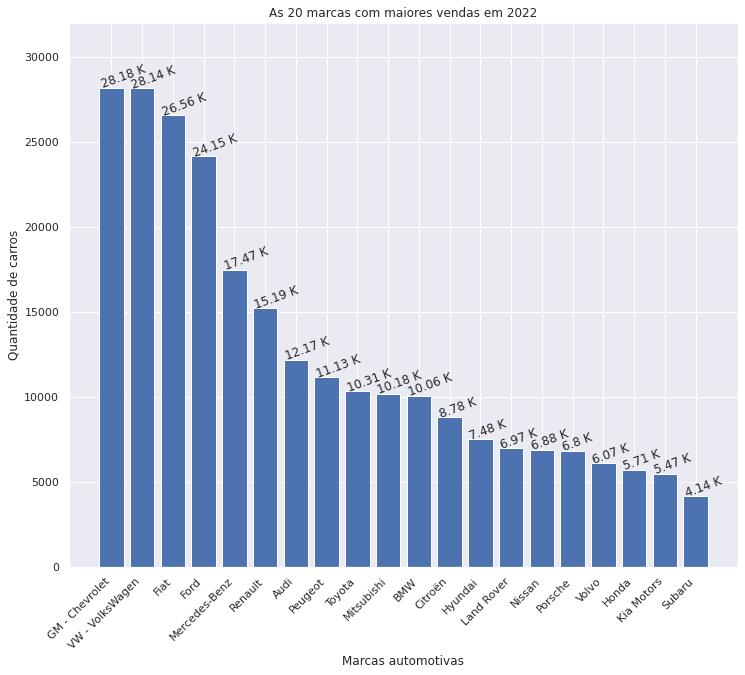

In [17]:
plt.figure(figsize= (12, 10))
bars = plt.bar(brand_sales.keys()[:20], brand_sales.values[:20])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x(), value + 0.1, f'{((value/1000).round(2))} K', rotation= 20)

plt.ylim([0, 32000])
plt.title('As 20 marcas com maiores vendas em 2022')
plt.ylabel('Quantidade de carros')
plt.xlabel('Marcas automotivas')
plt.xticks(rotation= 45, ha= 'right')
plt.show()

## Coluna `model` 

In [18]:
cars['model'].unique()

array(['NSX 3.0', 'Legend 3.2/3.5', 'Integra GS 1.8', ...,
       'C-200 AMG Line EQ Boost 1.5 TB (Hib.)',
       'CLASSIC LARAMIE 5.7 CD V8 4X4 Aut.',
       'CLASSIC LARAMIE NIGHT ED. 5.7 4X4 Aut.'], dtype=object)

In [19]:
f'São ao todo {len(cars["model"].unique())} modelos de carros diferentes presentes na tabela.'

'São ao todo 6064 modelos de carros diferentes presentes na tabela.'

Apesar de o modelo ser uma variável importante na determinação do preço de um carro, a grande quantidade de modelos no banco de dados talvez torne-a uma variável que não poderá ser inserida no modelo preditivo.

É possível plotar um gráfico que mostre os modelos mais comercializados no ano de 2022.

In [20]:
model_sales = cars.value_counts('model')
model_sales

model
Buggy/M-8/M-8 Long 1.6                      443
Buggy Plus 1.6 8V                           423
Buggy 1.6/ TST/ RS 1.6 4-Lug.               386
911 Turbo Coupe 3.6/3.8 (991/992)           292
Forester 2.0/2.0 S/2.0 ES 4x4 Aut.          282
                                           ... 
1500 CLASSIC LAR. NIGHT ED 5.7 4X4 Aut.       2
Discovery Metropolitan 3.0 4x4 MHEV Die       2
DAILY CH. 65-170 CD Curto 3.0 (Die.)(E5)      1
Corolla Cross SE 1.8 16V Aut. (Hybrid)        1
DAILY CHASSI 65-170 Curto 3.0 (Die.)(E5)      1
Length: 6064, dtype: int64

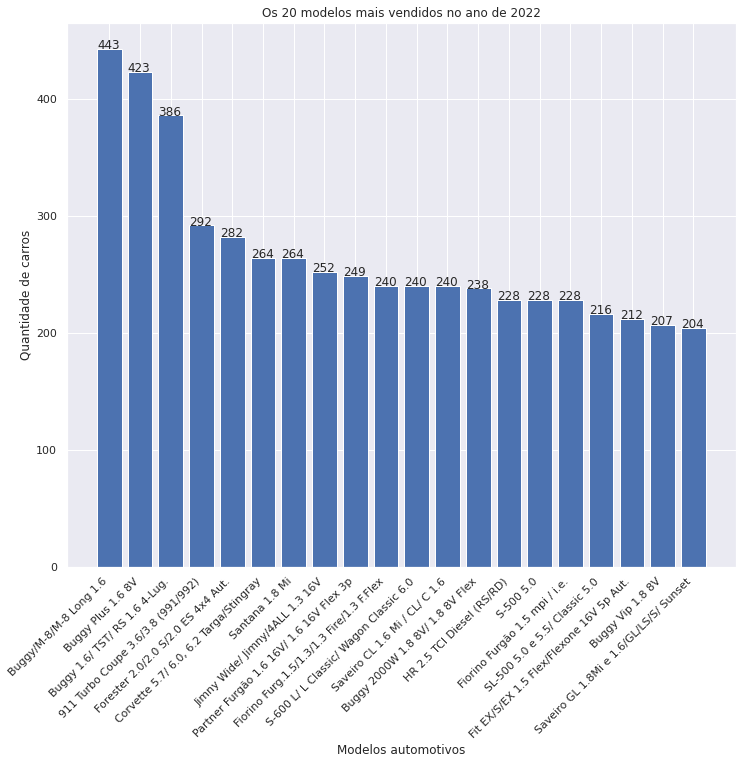

In [21]:
plt.figure(figsize= (12, 10))
bars = plt.bar(model_sales.keys()[:20], model_sales.values[:20])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x(), value, value)

plt.title('Os 20 modelos mais vendidos no ano de 2022')
plt.ylabel('Quantidade de carros')
plt.xlabel('Modelos automotivos')
plt.xticks(rotation= 45, ha= 'right')
plt.show()

## Coluna `fuel`

In [22]:
cars['fuel'].unique()

array(['Gasoline', 'Diesel', 'Alcohol'], dtype=object)

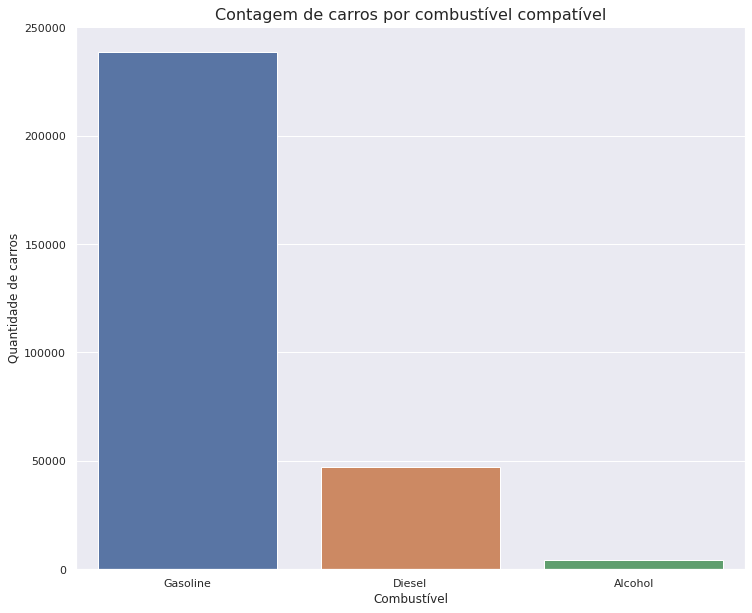

In [23]:
plt.figure(figsize= (12, 10))
ax = sns.countplot(data= cars, x= 'fuel')
ax.set_title('Contagem de carros por combustível compatível', fontsize= 16)
plt.ylabel('Quantidade de carros')
plt.xlabel('Combustível')
plt.show()

## Coluna `gear`

In [24]:
cars['gear'].unique()

array(['manual', 'automatic'], dtype=object)

## Coluna `engine_size`

In [25]:
cars['engine_size'].unique()

array([3. , 3.2, 1.8, 2.8, 2. , 1.7, 2.5, 6.5, 2.7, 4. , 2.2, 4.7, 6. ,
       2.6, 4.2, 2.4, 1.6, 3.6, 5.2, 5. , 1.4, 6.3, 2.9, 1.9, 3.8, 3.5,
       5.4, 4.4, 5.6, 4.8, 1.5, 6.6, 2.3, 4.9, 4.6, 1. , 1.3, 1.1, 4.1,
       4.3, 3.9, 2.1, 5.7, 3.1, 6.2, 1.2, 3.3, 6.1, 5.9, 6.7, 3.4, 5.5,
       4.5, 0.7, 5.8, 3.7])

Gráfico de distribuição de frequência da variável `engine_size`:

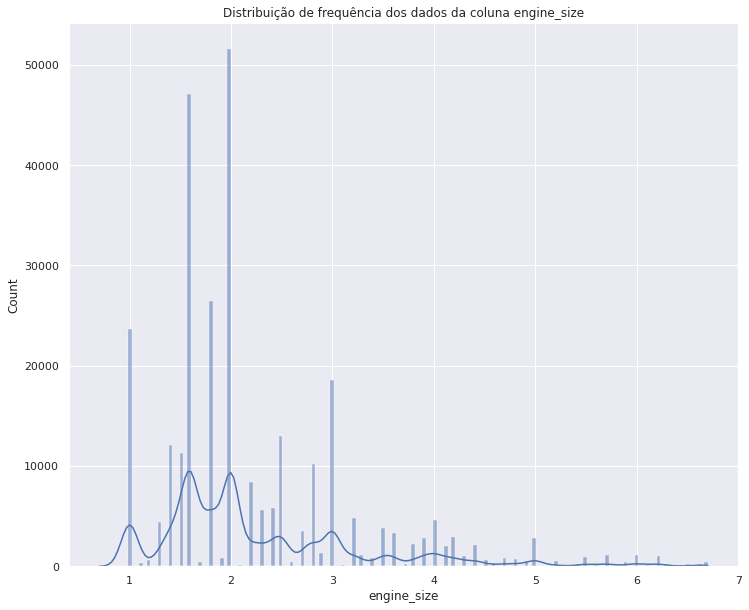

In [26]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(data= cars, x= 'engine_size', kde= True)
ax.set_title('Distribuição de frequência dos dados da coluna engine_size')
plt.show()

## Coluna `year_model`

In [27]:
cars['year_model'].unique()

array([1995, 1994, 1993, 1992, 1991, 1998, 1997, 1996, 2007, 2006, 2005,
       2004, 2011, 2010, 2009, 2008, 2015, 2014, 2013, 2012, 2023, 2022,
       2021, 2020, 2019, 2018, 2017, 2016, 1999, 2002, 2001, 2000, 2003,
       1990, 1989, 1988, 1987, 1986, 1985])

Gráfico de distribuição de frequência da variável `year_model`:

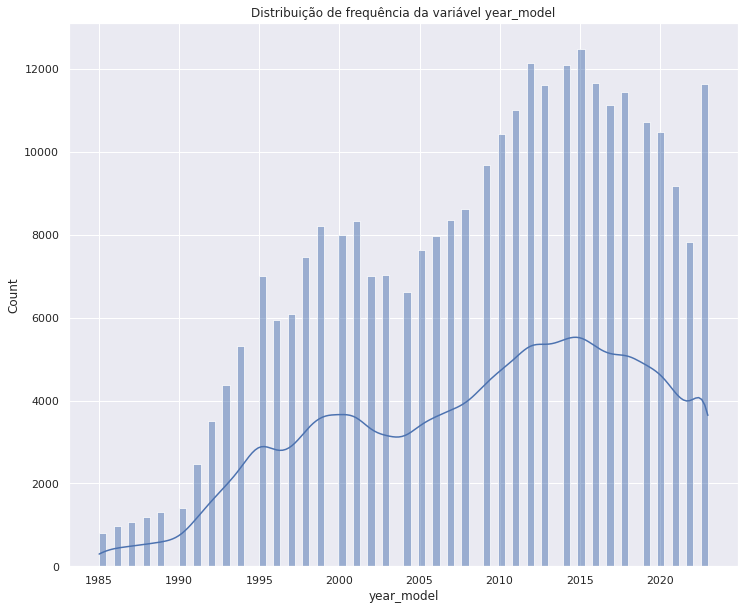

In [28]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(data= cars, x= 'year_model', kde= True)
ax.set_title('Distribuição de frequência da variável year_model')
plt.show()

## Coluna `avg_price_brl`

In [29]:
cars['avg_price_brl'].unique()

array([ 43779.,  42244.,  40841., ..., 237721.,  71892.,  50257.])

Gráfico de distribuição de frequência da variável `avg_price_brl`:

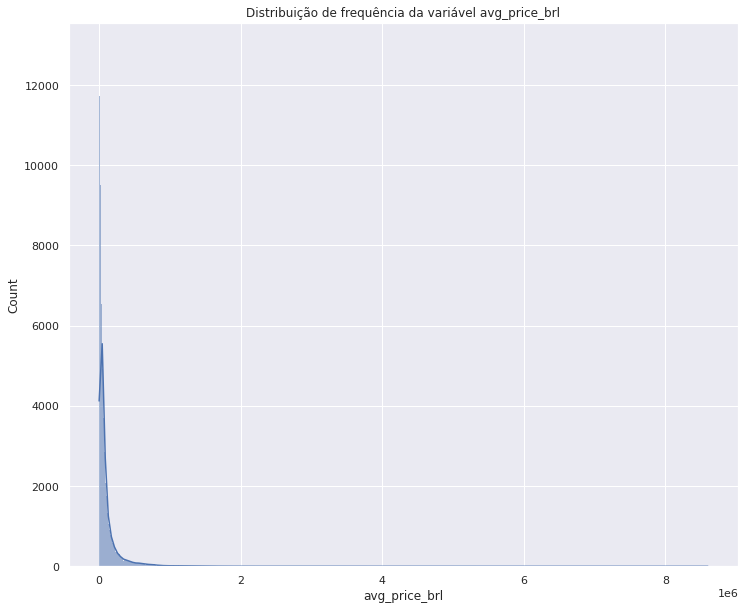

In [30]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(data= cars, x= 'avg_price_brl', kde= True)
ax.set_title('Distribuição de frequência da variável avg_price_brl')
plt.show()

## Coluna `age_years`

In [31]:
cars['age_years'].unique()

array([28, 29, 30, 31, 32, 25, 26, 27, 16, 17, 18, 19, 12, 13, 14, 15,  8,
        9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7, 24, 21, 22, 23, 20, 33,
       34, 35, 36, 37, 38])

Gráfico de distribuição de frequência da coluna `age_years`:

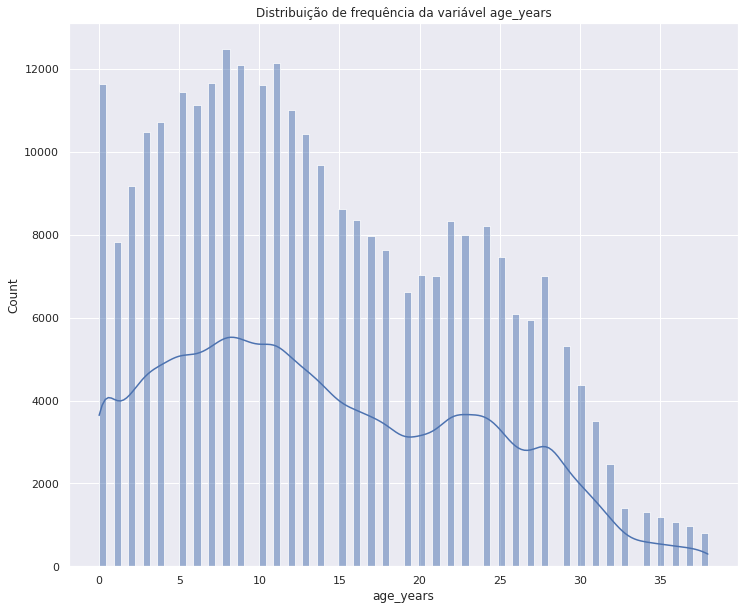

In [32]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(data= cars, x= 'age_years', kde= True)
ax.set_title('Distribuição de frequência da variável age_years')
plt.show()

# Tratamentos da base de dados

In [33]:
cars.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl', 'age_years'],
      dtype='object')

* Eliminação da coluna `year_of_reference`, `fipe_code` e `authentication`:

In [34]:
cars.drop(['year_of_reference', 'fipe_code', 'authentication'], axis= 1, inplace= True)

# Valores discrepantes

* Verificando a presença de valores discrepantes para `avg_price_brl`:

In [35]:
fig = px.box(cars['avg_price_brl'], orientation= 'h', title= 'Boxplot da variável avg_price_brl')
fig.update_layout(title= {'x': 0.5})


O limite superior do *boxplot* é de carros com valor R$ 232,593 mil. Analisando os veículos que ultrapassam esse valor tem-se que:

In [36]:
expensive_cars = cars.query('avg_price_brl > 232593')
expensive_cars.shape

(31998, 9)

Ao todo 31998 veículos com valores discrepantes.

In [37]:
expensive_cars['brand'].nunique()

39

De 39 marcas diferentes de carros.

In [38]:
expensive_cars['model'].nunique()

1108

E 1108 modelos diferentes.

* Média do valor de cada marca para esse conjunto específico de carros:

In [39]:
expensive_cars.groupby('brand')['avg_price_brl'].mean().round(2)

brand
AM Gen              408920.77
ASTON MARTIN        895911.19
Agrale              383475.95
Audi                456054.35
BMW                 466886.76
CAB Motors          235008.29
Caoa Chery          270392.42
Chrysler            243888.40
Citroën             234169.33
Dodge               238771.56
Ferrari            3309774.78
Fiat                243737.26
Ford                303718.93
GM - Chevrolet      354873.76
Honda               276103.86
Hyundai             298177.44
IVECO               266680.28
Jaguar              400026.00
Jeep                345834.78
Kia Motors          362065.46
Land Rover          500260.68
Lexus               382046.27
MINI                280010.77
Maserati            716233.84
Mclaren            3231483.19
Mercedes-Benz       537439.89
Mitsubishi          286018.90
Nissan              388677.47
Peugeot             248497.64
Porsche             724918.12
RAM                 445324.83
Renault             249410.64
Rolls-Royce        3857726.77
Suba

Analisando a média de preço de cada marca percebe-se que são montadoras com automóveis de valor realmente mais elevado.

# Estatísticas descritivas

In [40]:
cars.describe()

engine_size     year_model  avg_price_brl      age_years
count  290275.000000  290275.000000   2.902750e+05  290275.000000
mean        2.266047    2008.896633   1.220872e+05      14.103367
std         1.033109       9.263619   3.219139e+05       9.263619
min         0.700000    1985.000000   1.831000e+03       0.000000
25%         1.600000    2001.000000   2.187500e+04       7.000000
50%         2.000000    2010.000000   4.683600e+04      13.000000
75%         2.800000    2016.000000   1.061650e+05      22.000000
max         6.700000    2023.000000   8.600000e+06      38.000000

# Análise de correlação

In [41]:
cars.corr()

engine_size  year_model  avg_price_brl  age_years
engine_size       1.000000   -0.122644       0.345570   0.122644
year_model       -0.122644    1.000000       0.304294  -1.000000
avg_price_brl     0.345570    0.304294       1.000000  -0.304294
age_years         0.122644   -1.000000      -0.304294   1.000000

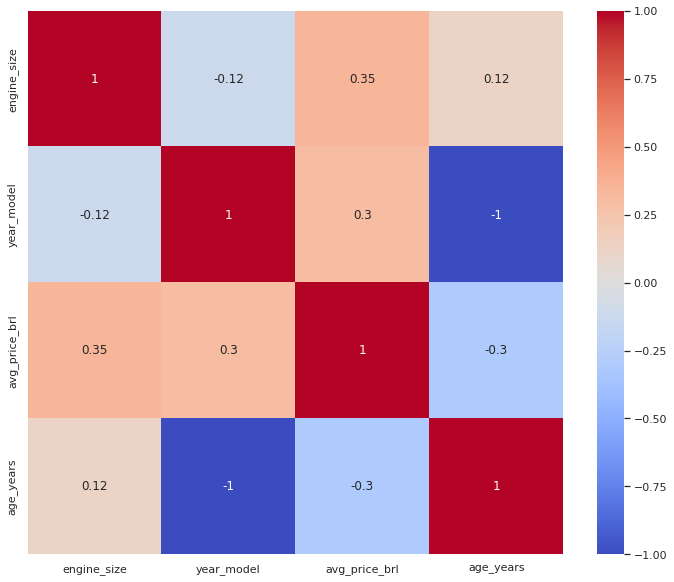

In [42]:
plt.figure(figsize= (12, 10))
sns.heatmap(cars.corr().round(2), cmap= 'coolwarm', annot= True)
plt.show()

# Análises gráficas entre as variáveis

In [43]:
cars.columns

Index(['month_of_reference', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl', 'age_years'],
      dtype='object')

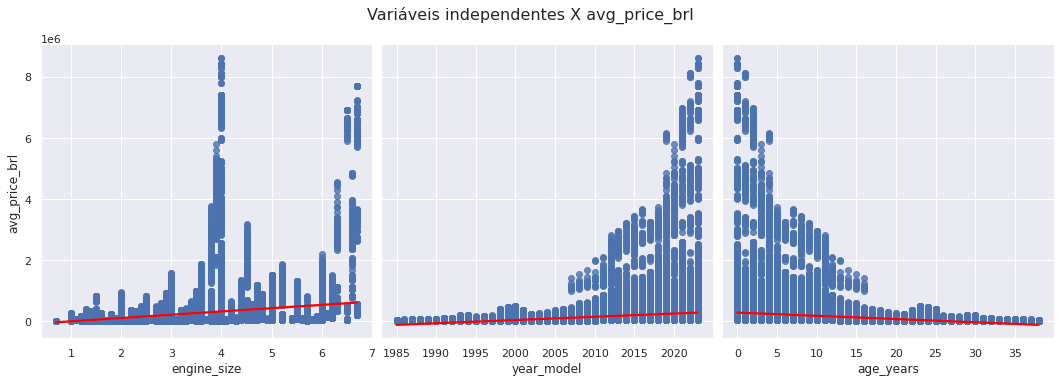

In [44]:
ax = sns.pairplot(
    data= cars, y_vars= 'avg_price_brl',
    x_vars= [
        'engine_size',
        'year_model', 
        'age_years'
    ], kind= 'reg', plot_kws= {'line_kws': {'color': 'red'}},
    height= 5
)
ax.fig.suptitle('Variáveis independentes X avg_price_brl', fontsize= 16, y= 1.05)
plt.show()

## Transformação dos dados (uso do log)

Como visto anteriormente a distribuição de frequência de `avg_price_brl` é assimétrica a direita, como mostra o gráfico:

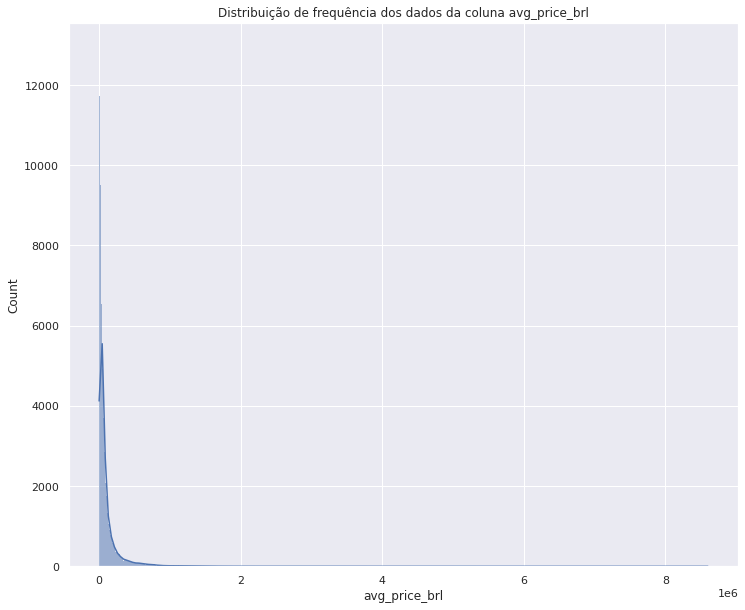

In [45]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(cars['avg_price_brl'], kde= True)
ax.set_title('Distribuição de frequência dos dados da coluna avg_price_brl')
plt.show()

Gráfico com a distribuição dos dados para mesma coluna (`avg_price_brl`) após a transformação usando o *log*:

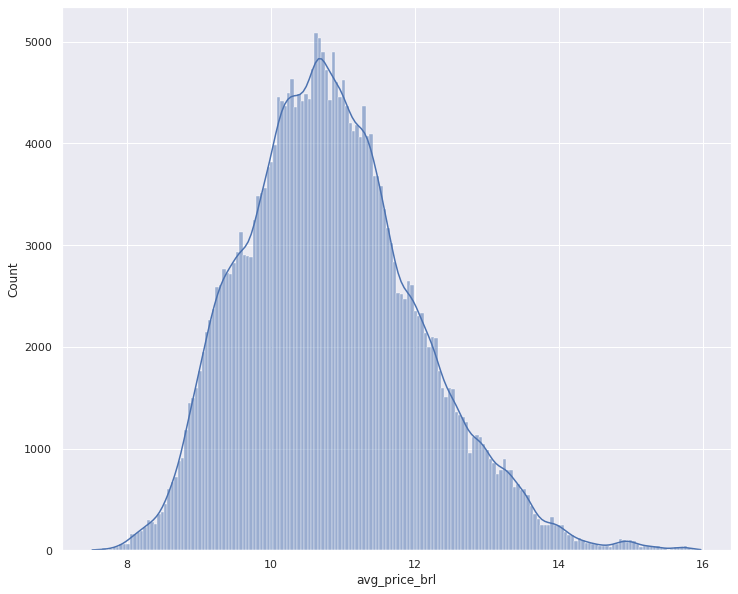

In [46]:
plt.figure(figsize= (12, 10))
sns.histplot(np.log(cars['avg_price_brl']), kde= True)
plt.show()

Percebe-se que ocorre uma aproximação de uma curva de distribuição normal. Portanto, também é necessário que as outras colunas com valores numéricos sejam transformados usando o *log*.

In [47]:
cars.describe()

engine_size     year_model  avg_price_brl      age_years
count  290275.000000  290275.000000   2.902750e+05  290275.000000
mean        2.266047    2008.896633   1.220872e+05      14.103367
std         1.033109       9.263619   3.219139e+05       9.263619
min         0.700000    1985.000000   1.831000e+03       0.000000
25%         1.600000    2001.000000   2.187500e+04       7.000000
50%         2.000000    2010.000000   4.683600e+04      13.000000
75%         2.800000    2016.000000   1.061650e+05      22.000000
max         6.700000    2023.000000   8.600000e+06      38.000000

A coluna `age_years` contém dados igual a **ZERO**, isso é um ponto de atenção para a transformação.

* Transformação para `avg_price_brl`:

In [48]:
cars['log_avg_price_brl'] = np.log(cars['avg_price_brl'])

* Transformação para `engine_size`:

In [49]:
cars['log_engine_size'] = np.log(cars['engine_size'])

* Transformação para `year_model`:

In [50]:
cars['log_year_model'] = np.log(cars['year_model'])

* Transformação para `age_years`:

In [51]:
cars['log_age_years'] = np.log(cars['age_years'] + 1) # como essa variável contém valores ZERO, e log(0) é igual a -infinito, deve-se somar 1!

## Análise de correlação dos dados transformados

In [52]:
cars.corr()[['log_engine_size', 'log_year_model', 'log_age_years', 'log_avg_price_brl']][4:].round(2)

log_engine_size  log_year_model  log_age_years  \
log_avg_price_brl             0.41            0.75          -0.71   
log_engine_size               1.00           -0.14           0.13   
log_year_model               -0.14            1.00          -0.90   
log_age_years                 0.13           -0.90           1.00   

                   log_avg_price_brl  
log_avg_price_brl               1.00  
log_engine_size                 0.41  
log_year_model                  0.75  
log_age_years                  -0.71

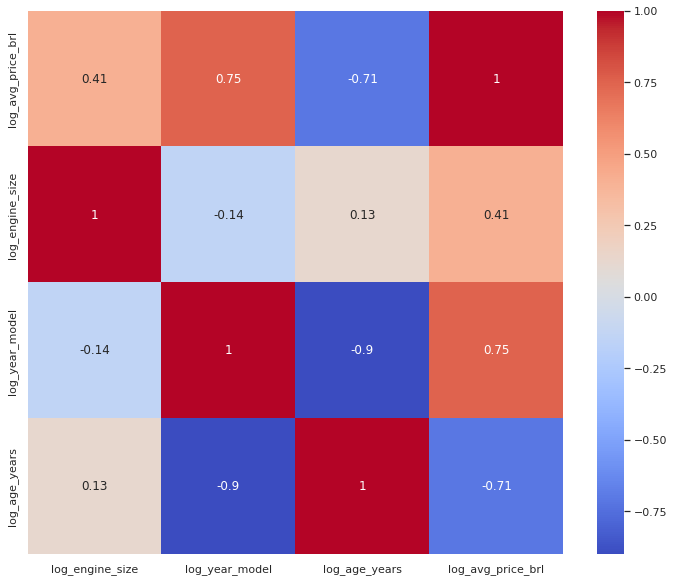

In [53]:
plt.figure(figsize= (12, 10))
sns.heatmap(cars.corr()[['log_engine_size', 'log_year_model', 'log_age_years', 'log_avg_price_brl']][4:].round(2), cmap= 'coolwarm', annot= True)
plt.show()

### Variáveis explicativas X variável dependente

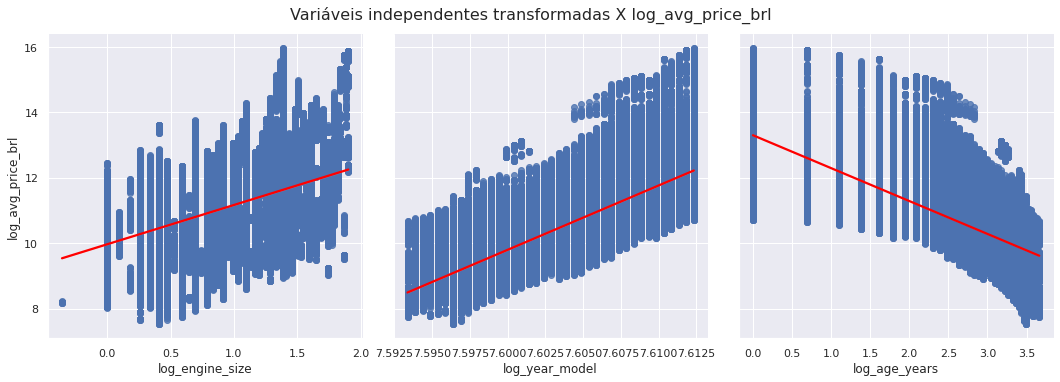

In [54]:
ax = sns.pairplot(
    data= cars, y_vars= 'log_avg_price_brl',
    x_vars= [
        'log_engine_size', 'log_year_model',
        'log_age_years'
    ], kind= 'reg', plot_kws= {'line_kws': {'color': 'red'}},
    height= 5
)
ax.fig.suptitle('Variáveis independentes transformadas X log_avg_price_brl', fontsize= 16, y= 1.05)
plt.show()

# Modelo de regressão linear

## Variáveis independentes e dependete

In [55]:
X = cars[['log_engine_size', 'log_year_model', 'log_age_years']]

In [56]:
y = cars['log_avg_price_brl']

## Separação dos dados em *train* e *test*

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

## Treinamento do modelo de regressão linear

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr = LinearRegression()

In [61]:
lr.fit(X_train, y_train)

LinearRegression()

### Coeficiente de determinação (R²) dos dados de treino 

In [62]:
from sklearn import metrics

In [63]:
f'O coeficiente de determinação (R²) dos dados de treino é: {lr.score(X_train, y_train).round(2)}'

'O coeficiente de determinação (R²) dos dados de treino é: 0.84'

## Gerando previsões com os dados de teste

In [64]:
y_predict = lr.predict(X_test)

In [65]:
y_predict

array([10.94163355,  9.15937973, 12.18420167, ..., 10.91909442,
        9.77918652, 12.88127781])

* *Dataframe* com as comparações de valores reais (y_test) e valores previstos (y_predict):

In [66]:
pd.DataFrame({'y_test': y_test, 'y_predict': y_predict})

y_test  y_predict
128142  10.917268  10.941634
234349   9.343647   9.159380
249797  11.273462  12.184202
280865  12.270155  11.421703
31295   10.432644  10.197189
...           ...        ...
187950  10.837107  11.146732
283124   9.778661  10.524752
17329   10.662563  10.919094
233507   8.851520   9.779187
64189   12.908975  12.881278

[58055 rows x 2 columns]

## Parâmetros de qualidade do modelo de previsão

* Obtêm-se os valores de MSE, RMSE e R² do modelo de previsão:

In [67]:
MSE = metrics.mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
R2 = metrics.r2_score(y_test, y_predict)

In [68]:
print(f'MSE: {MSE.round(2)}')
print('='* 25)
print(f'RMSE: {RMSE.round(2)}')
print('='* 25)
print(f'R²: {R2.round(2)}')

MSE: 0.23
RMSE: 0.48
R²: 0.84


## Intercepto e coeficientes do modelo

* Intercepto:

In [69]:
lr.intercept_.round(2)

-1317.3

* Coeficientes do modelo:

In [70]:
lr.coef_

array([  1.53595638, 174.56397612,  -0.24366835])

In [71]:
X.columns

Index(['log_engine_size', 'log_year_model', 'log_age_years'], dtype='object')

In [72]:
index = ['Intercepto', 'log_engine_size', 'log_year_model', 'log_age_years']

In [73]:
pd.DataFrame(np.append(lr.intercept_, lr.coef_), index= index, columns= ['Parâmetros'])

Parâmetros
Intercepto      -1317.303190
log_engine_size     1.535956
log_year_model    174.563976
log_age_years      -0.243668

# Análises dos resultados do modelo

In [74]:
y_predict_train = lr.predict(X_train)

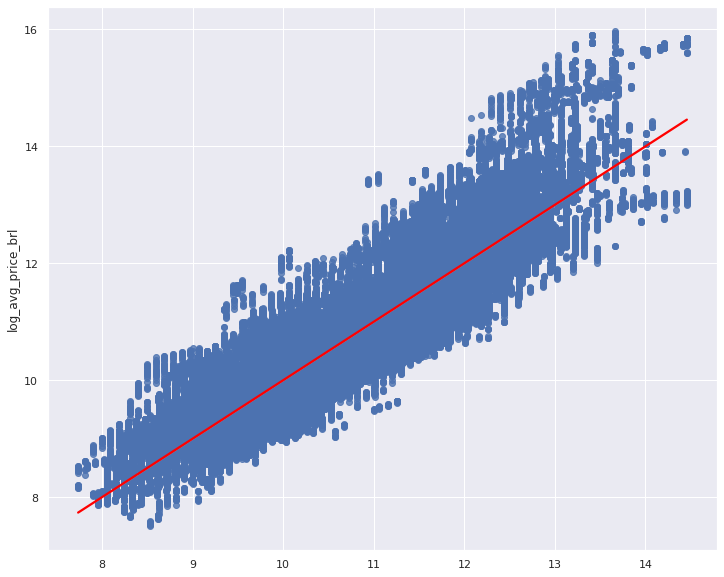

In [75]:
plt.figure(figsize= (12, 10))
sns.regplot(x= y_predict_train, y= y_train, line_kws= {'color': 'red'})
plt.show()

## Análise dos resíduos

In [76]:
residuo = y_train - y_predict_train

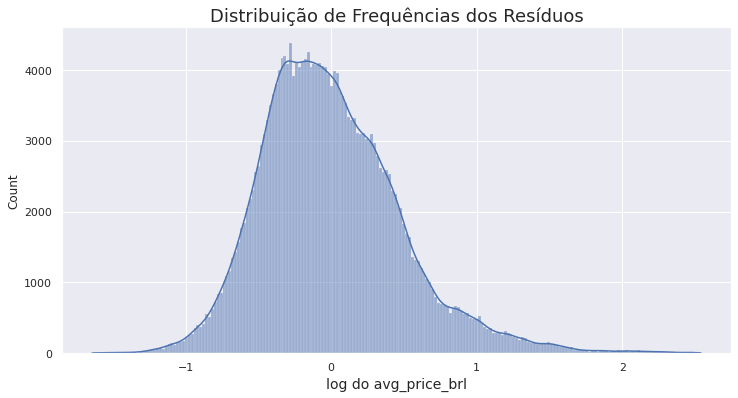

In [77]:
ax = sns.histplot(residuo, kde= True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do avg_price_brl', fontsize=14)
plt.show()

# Modelo com pré-processamento das variáveis categóricas

Instalando a biblioteca `category_encoders`

In [78]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 970 kB/s 


Importando a biblioteca

In [79]:
from category_encoders.one_hot import OneHotEncoder

## Separação dos dados de *train* e *test*, agora mantendo as variáveis categóricas

* Definindo a nova variável X que contém as variáveis independentes:

In [80]:
cars.columns

Index(['month_of_reference', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl', 'age_years', 'log_avg_price_brl',
       'log_engine_size', 'log_year_model', 'log_age_years'],
      dtype='object')

In [81]:
X = cars[['brand', 'fuel', 'gear', 'log_engine_size', 'log_year_model', 'log_age_years']]

* Separa-se os dados em *train* e *test*: 

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

* Instanciando a classe OneHotEncoder:

In [83]:
cars[['brand', 'model', 'fuel', 'gear']].head()

brand    model      fuel    gear
0  Acura  NSX 3.0  Gasoline  manual
1  Acura  NSX 3.0  Gasoline  manual
2  Acura  NSX 3.0  Gasoline  manual
3  Acura  NSX 3.0  Gasoline  manual
4  Acura  NSX 3.0  Gasoline  manual

Apesar de também ser uma variável categórica, os dados da coluna `model` contam com milhares de dados, o que torna difícil realizar o seu pré-processamento.

* Instancia-se a classe *OneHotEncoder* passando os parâmetros desejados:

In [84]:
encoder = OneHotEncoder(cols= ['brand', 'fuel', 'gear'], use_cat_names= True)

* E realiza-se o pré-processamento nos dados de treino e teste:

In [85]:
X_train = encoder.fit_transform(X_train)

In [86]:
X_train.head()

brand_Audi  brand_BMW  brand_Peugeot  brand_Renault  brand_Volvo  \
48918            1          0              0              0            0   
122077           0          1              0              0            0   
210472           0          0              1              0            0   
168930           1          0              0              0            0   
212043           0          0              0              1            0   

        brand_VW - VolksWagen  brand_Subaru  brand_GM - Chevrolet  brand_Jeep  \
48918                       0             0                     0           0   
122077                      0             0                     0           0   
210472                      0             0                     0           0   
168930                      0             0                     0           0   
212043                      0             0                     0           0   

        brand_Toyota  ...  brand_Mercury  brand_GREAT WALL  fuel_Gasoline  \
48918              0  ...              0                 0              1   
122077             0  ...              0                 0              1   
210472             0  ...              0                 0              1   
168930             0  ...              0                 0              1   
212043             0  ...              0                 0              1   

        fuel_Alcohol  fuel_Diesel  gear_manual  gear_automatic  \
48918              0            0            1               0   
122077             0            0            1               0   
210472             0            0            0               1   
168930             0            0            1               0   
212043             0            0            0               1   

        log_engine_size  log_year_model  log_age_years  
48918          1.098612        7.609862       1.791759  
122077         0.693147        7.609367       1.945910  
210472         0.470004        7.609862       1.791759  
168930         0.875469        7.599902       3.258097  
212043         0.693147        7.607381       2.397895  

[5 rows x 94 columns]

In [87]:
X_test = encoder.transform(X_test)

## Treinando um novo modelo de regressão com as variáveis categóricas pré-processadas

* Treinamento do modelo:

In [88]:
lr2 = LinearRegression()

In [89]:
lr2.fit(X_train, y_train)

LinearRegression()

* Coeficiente de determinação (R²) do modelo com as variáveis categóricas pré-processadas:

In [90]:
f'O coeficiente de determinação (R²) do modelo com as variáveis categóricas é: {lr2.score(X_train, y_train).round(2)}'

'O coeficiente de determinação (R²) do modelo com as variáveis categóricas é: 0.93'

## Gerando previões com as variáveis categóricas tratadas agora inclusas

In [91]:
y_pred_2 = lr2.predict(X_test)

In [92]:
y_pred_2

array([10.80712891,  9.13525391, 11.22802734, ..., 10.54833984,
        9.41845703, 12.81640625])

* *Dataframe* com as comparações de valores reais (y_test) e valores previstos (y_predict_2):

In [93]:
pd.DataFrame({'y_test': np.exp(y_test), 'y_pred_2': np.exp(y_pred_2)})

y_test       y_pred_2
128142   55120.0   49371.514448
234349   11426.0    9276.632718
249797   78705.0   75209.087252
280865  213236.0  154243.694502
31295    33950.0   28741.957882
...          ...            ...
187950   50874.0   49323.323613
283124   17653.0   24381.075108
17329    42726.0   38114.110381
233507    6985.0   12313.568104
64189   403921.0  368209.095469

[58055 rows x 2 columns]

## Parâmetros de qualidade do novo modelo de predição

Obtêm-se os valores de MSE, RMSE e R² do novo modelo de previsão:


In [94]:
MSE = metrics.mean_squared_error(y_test, y_pred_2)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_2))
R2 = metrics.r2_score(y_test, y_pred_2)

In [95]:
print(f'MSE: {MSE.round(2)}')
print('='* 25)
print(f'RMSE: {RMSE.round(2)}')
print('='* 25)
print(f'R²: {R2.round(2)}')

MSE: 0.1
RMSE: 0.32
R²: 0.93


## Análise dos resultados do novo modelo

In [96]:
y_pred_2_train = lr2.predict(X_train)

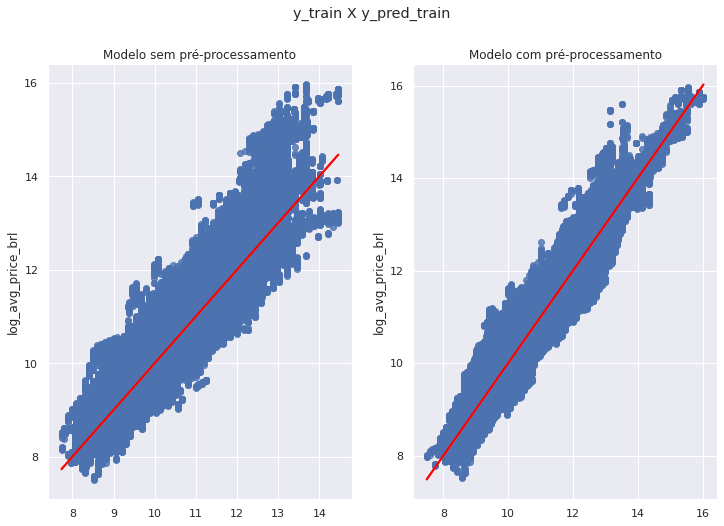

In [112]:
fig, axes = plt.subplots(1, 2, figsize= (12, 8))
fig.suptitle('y_train X y_pred_train')
ax1 = sns.regplot(x= y_predict_train, y= y_train, line_kws= {'color': 'red'}, ax= axes[0])
ax1.set_title('Modelo sem pré-processamento')
ax2 = sns.regplot(x= y_pred_2_train, y= y_train, line_kws= {'color': 'red'}, ax= axes[1])
ax2.set_title('Modelo com pré-processamento')
plt.show()

É possível perceber que o modelo que leva em conta o pré-processamento das variáveis categóricas possui os dados mais ajustados a linha de regressão.

## Análise dos resíduos do novo modelo

In [98]:
residuo_2 = y_train - y_pred_2_train

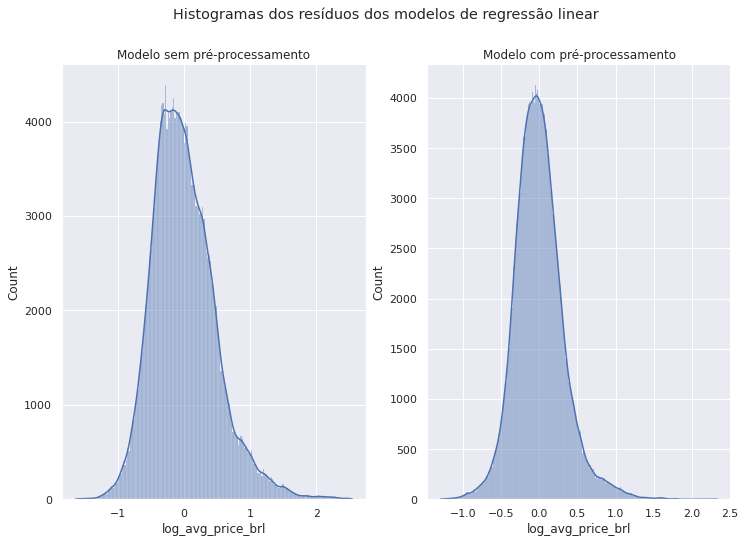

In [116]:
fig, axes = plt.subplots(1, 2, figsize= (12, 8))
fig.suptitle('Histogramas dos resíduos dos modelos de regressão linear')
ax1 = sns.histplot(residuo, kde= True, ax= axes[0])
ax1.set_title('Modelo sem pré-processamento')
ax2 = sns.histplot(residuo_2, kde= True, ax= axes[1])
ax2.set_title('Modelo com pré-processamento')
plt.show()

Além disso, o modelo que conta com o pré-processamento das variáveis categóricas também possui resíduo com distribuição que se aproxima bastante de uma normal. Mais do que o modelo sem pré-processamento!